In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Projekt - prva godina/kod/alldatasets_hr

[Errno 2] No such file or directory: '/content/drive/MyDrive/Projekt - prva godina/kod/alldatasets_hr'
/content


In [ ]:
# %cd /content/drive/MyDrive/Projekt - prva godina/kod

/content/drive/MyDrive/Projekt - prva godina/kod


# 03 - Sentence Classification with BERT

**Status: Work in progress. Check back later.**

In this notebook, we will use pre-trained deep learning models to process some text. We will then use the outputs of that models to classify the text. The text is a list of sentences from Booking reviews. And we will classify each sentence as either speaking "positively" about its subject or "negatively".

## Models
For classification we will use are machine learning using the Scikit Learn library. The deep learning model is BERT, DistilBERT, RoBERTa, AlBERTa and CroSloEngual BERT. We will use the implementation from the [huggingface transformers library](https://huggingface.co/).

## Dataset
The dataset we will use in this example is written in Croatian language, which contains sentences from booking reviews, each labeled as either positive (has the value 1) or negative (has the value 0):

## Installing the transformers library
Let's start by installing the huggingface transformers library so we can load our deep learning NLP models.

In [ ]:
!pip install lemmagen3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12.5 MB 14.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 213 kB 74.4 MB/s 


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.3 MB 14.2 MB/s 


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.9 MB 14.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.6 MB 64.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 120 kB 77.9 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

## Importing the dataset
We'll use pandas to read the dataset and load it into a dataframe.

In [ ]:
df = pd.read_excel('HRdataset.xlsx')

In [ ]:
df.head()

review     label
0  Sve je bilo odliƒçno. Gospoƒëa koja nas je doƒçek...  Positive
1  Vrlo lijepo ureƒëeno, prozraƒçno, izuzetno ƒçisto...  Positive
2        Odliƒçna lokacija, uredno, srdaƒçna domaƒáica.  Positive
3                           Malen i sladak apartman.  Positive
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...  Positive

In [ ]:
df['label'] = df['label'].replace('Positive', 1)
df['label'] = df['label'].replace('Negative', 0)
df.tail()

review  label
11462                       Steta sto su prozori fiksni.      0
11463                          NEMA BESPLATNOG PARKINGA!      0
11464                      Nemam odgovor, sve je EKSTRA!      0
11465  Jako uredno i ƒçisto. Sve je kao i na slikama. ...      1
11466  Domaƒáin ljubazan,lokacijama izvrsna udobno i ƒç...      1

In [ ]:
df.shape

(11467, 2)

In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates()

2126


In [ ]:
print(df.isna().sum())
df = df.dropna()

review    2
label     0
dtype: int64


In [ ]:
df.shape

(9339, 2)

For performance reasons, we'll only use 5,000 sentences from the dataset

In [ ]:
# batch_1 = df[:5000]

We can ask pandas how many sentences are labeled as "positive" (value 1) and how many are labeled "negative" (having the value 0)

## Loading the Pre-trained BERT model
Let's now load a pre-trained BERT model.

In [ ]:
from transformers import AutoModel, AutoTokenizer

model_class, tokenizer_class, pretrained_weights = (AutoModel, AutoTokenizer, 'EMBEDDIA/crosloengual-bert')

# EMBEDDIA/crosloengual-bert

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/46.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the model checkpoint at EMBEDDIA/crosloengual-bert were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from transformers import AlbertTokenizer, AlbertModel

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = AlbertModel.from_pretrained("albert-base-v2")

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertModel: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.dense.bias', 'predictions.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Preparing the Dataset - Text preprocessing
Before we can hand our sentences to BERT, we need to so some minimal processing to put them in the format it requires.

#### Punctuation Removal

In [ ]:
#library that contains punctuation
import string

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree= "".join([i for i in str(text) if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['wop_review']= df['review'].apply(lambda x:remove_punctuation(x))
df.head()

review  label  \
0  Sve je bilo odliƒçno. Gospoƒëa koja nas je doƒçek...      1   
1  Vrlo lijepo ureƒëeno, prozraƒçno, izuzetno ƒçisto...      1   
2        Odliƒçna lokacija, uredno, srdaƒçna domaƒáica.      1   
3                           Malen i sladak apartman.      1   
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...      1   

                                          wop_review  
0  Sve je bilo odliƒçno Gospoƒëa koja nas je doƒçeka...  
1  Vrlo lijepo ureƒëeno prozraƒçno izuzetno ƒçisto o...  
2           Odliƒçna lokacija uredno srdaƒçna domaƒáica  
3                            Malen i sladak apartman  
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...

#### Lowering the text

In [ ]:
df['l_review']= df['wop_review'].apply(lambda x: x.lower())
df.head()

review  label  \
0  Sve je bilo odliƒçno. Gospoƒëa koja nas je doƒçek...      1   
1  Vrlo lijepo ureƒëeno, prozraƒçno, izuzetno ƒçisto...      1   
2        Odliƒçna lokacija, uredno, srdaƒçna domaƒáica.      1   
3                           Malen i sladak apartman.      1   
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...      1   

                                          wop_review  \
0  Sve je bilo odliƒçno Gospoƒëa koja nas je doƒçeka...   
1  Vrlo lijepo ureƒëeno prozraƒçno izuzetno ƒçisto o...   
2           Odliƒçna lokacija uredno srdaƒçna domaƒáica   
3                            Malen i sladak apartman   
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...   

                                            l_review  
0  sve je bilo odliƒçno gospoƒëa koja nas je doƒçeka...  
1  vrlo lijepo ureƒëeno prozraƒçno izuzetno ƒçisto o...  
2           odliƒçna lokacija uredno srdaƒçna domaƒáica  
3                            malen i sladak apartman  
4  apartman je na izvrsnoj lokaciji a gospoƒëa je ...

#### Stop words removal

In [ ]:
%cd /content/drive/MyDrive/Projekt - prva godina/kod

/content/drive/MyDrive/Projekt - prva godina/kod


In [ ]:
my_file = open("stopwords_cro.txt", "r")
content = my_file.read()
stopwords_list = content.split("\n")
my_file.close()

In [ ]:
stopwords_list[0:10]

['a', 'ako', 'ali', 'bi', 'bih', 'bila', 'bili', 'bilo', 'bio', 'bismo']

In [ ]:
# defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
  output= " ".join([i for i in text.split(' ') if i not in stopwords_list])
  return output

In [ ]:
df['wos_review']= df['l_review'].apply(lambda x:remove_stopwords(x))

In [ ]:
df.head()

review  label  \
0  Sve je bilo odliƒçno. Gospoƒëa koja nas je doƒçek...      1   
1  Vrlo lijepo ureƒëeno, prozraƒçno, izuzetno ƒçisto...      1   
2        Odliƒçna lokacija, uredno, srdaƒçna domaƒáica.      1   
3                           Malen i sladak apartman.      1   
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...      1   

                                          wop_review  \
0  Sve je bilo odliƒçno Gospoƒëa koja nas je doƒçeka...   
1  Vrlo lijepo ureƒëeno prozraƒçno izuzetno ƒçisto o...   
2           Odliƒçna lokacija uredno srdaƒçna domaƒáica   
3                            Malen i sladak apartman   
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...   

                                            l_review  \
0  sve je bilo odliƒçno gospoƒëa koja nas je doƒçeka...   
1  vrlo lijepo ureƒëeno prozraƒçno izuzetno ƒçisto o...   
2           odliƒçna lokacija uredno srdaƒçna domaƒáica   
3                            malen i sladak apartman   
4  apartman je na izvrsnoj lokaciji a gospoƒëa je ...   

                                          wos_review  
0  odliƒçno gospoƒëa doƒçekala jako ljubazna apartma...  
1  lijepo ureƒëeno prozraƒçno izuzetno ƒçisto odliƒçn...  
2           odliƒçna lokacija uredno srdaƒçna domaƒáica  
3                              malen sladak apartman  
4  apartman izvrsnoj lokaciji gospoƒëa ljubazna do...

#### Stemming

In [ ]:
from StemmerHr.croatian_stemmer.stem import StemmerHr

stemmer = StemmerHr()
df['s_review']= df['wos_review'].apply(lambda x: stemmer.stem_text(x))
df.head()

review  label  \
0  Sve je bilo odliƒçno. Gospoƒëa koja nas je doƒçek...      1   
1  Vrlo lijepo ureƒëeno, prozraƒçno, izuzetno ƒçisto...      1   
2        Odliƒçna lokacija, uredno, srdaƒçna domaƒáica.      1   
3                           Malen i sladak apartman.      1   
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...      1   

                                          wop_review  \
0  Sve je bilo odliƒçno Gospoƒëa koja nas je doƒçeka...   
1  Vrlo lijepo ureƒëeno prozraƒçno izuzetno ƒçisto o...   
2           Odliƒçna lokacija uredno srdaƒçna domaƒáica   
3                            Malen i sladak apartman   
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...   

                                            l_review  \
0  sve je bilo odliƒçno gospoƒëa koja nas je doƒçeka...   
1  vrlo lijepo ureƒëeno prozraƒçno izuzetno ƒçisto o...   
2           odliƒçna lokacija uredno srdaƒçna domaƒáica   
3                            malen i sladak apartman   
4  apartman je na izvrsnoj lokaciji a gospoƒëa je ...   

                                          wos_review  \
0  odliƒçno gospoƒëa doƒçekala jako ljubazna apartma...   
1  lijepo ureƒëeno prozraƒçno izuzetno ƒçisto odliƒçn...   
2           odliƒçna lokacija uredno srdaƒçna domaƒáica   
3                              malen sladak apartman   
4  apartman izvrsnoj lokaciji gospoƒëa ljubazna do...   

                                            s_review  
0  [odliƒçn, gospoƒë, doƒçeka, jak, ljubazn, apartma...  
1  [lijep, ureƒëen, prozraƒçn, izuzetn, ƒçist, odliƒç...  
2          [odliƒçn, lokacij, uredn, srdaƒçn, domaƒáic]  
3                          [malen, sladak, apartman]  
4  [apartman, izvrsn, lokacij, gospoƒë, ljubazn, d...

#### Lematization

In [ ]:
from lemmagen3 import Lemmatizer

lem_hr = Lemmatizer('hr')
df['lem_review']= df['s_review'].apply(lambda x: " ".join([lem_hr.lemmatize(token) for token in x]))
df.head()

review  label  \
0  Sve je bilo odliƒçno. Gospoƒëa koja nas je doƒçek...      1   
1  Vrlo lijepo ureƒëeno, prozraƒçno, izuzetno ƒçisto...      1   
2        Odliƒçna lokacija, uredno, srdaƒçna domaƒáica.      1   
3                           Malen i sladak apartman.      1   
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...      1   

                                          wop_review  \
0  Sve je bilo odliƒçno Gospoƒëa koja nas je doƒçeka...   
1  Vrlo lijepo ureƒëeno prozraƒçno izuzetno ƒçisto o...   
2           Odliƒçna lokacija uredno srdaƒçna domaƒáica   
3                            Malen i sladak apartman   
4  Apartman je na izvrsnoj lokaciji a gospoƒëa je ...   

                                            l_review  \
0  sve je bilo odliƒçno gospoƒëa koja nas je doƒçeka...   
1  vrlo lijepo ureƒëeno prozraƒçno izuzetno ƒçisto o...   
2           odliƒçna lokacija uredno srdaƒçna domaƒáica   
3                            malen i sladak apartman   
4  apartman je na izvrsnoj lokaciji a gospoƒëa je ...   

                                          wos_review  \
0  odliƒçno gospoƒëa doƒçekala jako ljubazna apartma...   
1  lijepo ureƒëeno prozraƒçno izuzetno ƒçisto odliƒçn...   
2           odliƒçna lokacija uredno srdaƒçna domaƒáica   
3                              malen sladak apartman   
4  apartman izvrsnoj lokaciji gospoƒëa ljubazna do...   

                                            s_review  \
0  [odliƒçn, gospoƒë, doƒçeka, jak, ljubazn, apartma...   
1  [lijep, ureƒëen, prozraƒçn, izuzetn, ƒçist, odliƒç...   
2          [odliƒçn, lokacij, uredn, srdaƒçn, domaƒáic]   
3                          [malen, sladak, apartman]   
4  [apartman, izvrsn, lokacij, gospoƒë, ljubazn, d...   

                                          lem_review  
0  odliƒçn gospoƒë doƒçekati jak ljubazn apartman ƒçi...  
1  lijep urediti prozraƒçn izuzetn ƒçist odliƒçn lok...  
2                odliƒçn lokacij uredn srdaƒçn domaƒáic  
3                              malen sladak apartman  
4  apartman izvrsn lokacij gospoƒë ljubazn dozvoli...

In [ ]:
# sentence = df['Tweet'][0]
# tokens = sentence.split()
# sentence_lemmatized = ' '.join([lem_hr.lemmatize(token) for token in tokens])
# sentence_lemmatized



### Tokenization
Our first step is to tokenize the sentences -- break them up into word and subwords in the format BERT is comfortable with.

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df.head()

Unnamed: 0                                             review  label  \
0        9679  Osoba na recepciji ljubazno nas je doƒçekala, d...      1   
1        1061  Doruƒçak odliƒçan. Lokacija izvrsna blizu autobu...      1   
2        8933  Sve pohvale domaƒáinu. Jako ljubazan i na usluz...      1   
3        9920                      Cure na recepciji i sobarice.      1   
4        9392  Posebno mi se svidja cijena s obziron da smjes...      1   

                                           wop_tweet  \
0  Osoba na recepciji ljubazno nas je doƒçekala do...   
1  Doruƒçak odliƒçan Lokacija izvrsna blizu autobus...   
2  Sve pohvale domaƒáinu Jako ljubazan i na usluzi...   
3                       Cure na recepciji i sobarice   
4  Posebno mi se svidja cijena s obziron da smjes...   

                                             l_tweet  \
0  osoba na recepciji ljubazno nas je doƒçekala do...   
1  doruƒçak odliƒçan lokacija izvrsna blizu autobus...   
2  sve pohvale domaƒáinu jako ljubazan i na usluzi...   
3                       cure na recepciji i sobarice   
4  posebno mi se svidja cijena s obziron da smjes...   

                                           wos_tweet  \
0  osoba recepciji ljubazno doƒçekala dozvolila mo...   
1  doruƒçak odliƒçan lokacija izvrsna blizu autobus...   
2  pohvale domaƒáinu jako ljubazan usluzi svojim g...   
3                            cure recepciji sobarice   
4  posebno svidja cijena obziron smjestaji neposr...   

                                             s_tweet  \
0  [osob, recepcij, ljubazn, doƒçeka, dozvoli, ost...   
1  [doruƒçak, odliƒçan, lokacij, izvrsn, bliz, auto...   
2  [pohva, domaƒáin, jak, ljubazan, usluz, svoji, ...   
3                           [cur, recepcij, sobaric]   
4  [posebn, svidj, cijen, obziron, smjestaj, nepo...   

                                           lem_tweet  
0  osob recepcij ljubazn doƒçekati dozvoliti ostav...  
1  doruƒçak odliƒçan lokacij izvrsn bliz autobusn k...  
2  pohva domaƒáin jak ljubazan usluz svoj gost apa...  
3                               cur recepcij sobaric  
4  posebn svidj cijen obziron smjestajati neposre...

In [ ]:
# df.to_excel("shuffled.xlsx")

In [ ]:
batch_1 = df[:5000]

In [ ]:
batch_1['label'].value_counts()

1    3116
0    1884
Name: label, dtype: int64

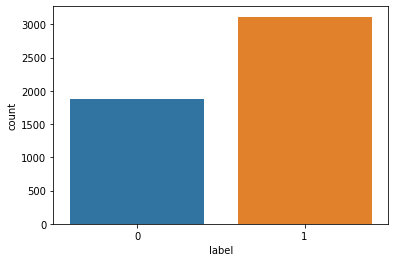

In [ ]:
ax = sns.countplot(batch_1.label)

In [ ]:
batch_1.isna().sum()

review        0
label         0
wop_review    0
l_review      0
wos_review    0
s_review      0
lem_review    0
dtype: int64

In [ ]:
# batch_1 = batch_1.dropna()

In [ ]:
tokenized = batch_1['lem_review'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
tokenized

0       [103, 22078, 36779, 20339, 38302, 35842, 1007,...
1       [103, 22824, 16466, 12514, 14932, 1045, 29094,...
2       [103, 22078, 36779, 26752, 7334, 1045, 5871, 1...
3                   [103, 18493, 27896, 1353, 34328, 104]
4       [103, 34328, 27100, 26752, 20339, 38302, 13493...
                              ...                        
5760    [103, 25901, 1353, 12463, 25757, 1842, 18201, ...
5761    [103, 12897, 8566, 1035, 19170, 1007, 6049, 26...
5762    [103, 32608, 10341, 5991, 34123, 1353, 6217, 1...
5763    [103, 22824, 10331, 22443, 9881, 25901, 1353, ...
5764    [103, 31232, 3733, 32172, 13493, 13957, 19170,...
Name: lem_review, Length: 5000, dtype: object

In [ ]:
# batch_1['lem_review'][0]

### Padding
After tokenization, `tokenized` is a list of sentences -- each sentences is represented as a list of tokens. We define a PyTorch dataset and data loader for processing text data to tokenize and prepare text data for training a natural language processing (NLP) model.

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
MAX_LEN = 64

In [ ]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.review.to_numpy(),
    targets=df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
BATCH_SIZE = 4000

train_data_loader = create_data_loader(df, tokenizer, MAX_LEN, BATCH_SIZE)
# val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
# test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
data.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([4000, 64])
torch.Size([4000, 64])
torch.Size([4000])


## Model #1: And Now, Deep Learning!
Now that we have our model and inputs ready, let's run our model!

The `model()` function runs our sentences through BERT. The results of the processing will be returned into `last_hidden_states`.

In [ ]:
# input_ids = torch.tensor(padded)
# attention_mask = torch.tensor(attention_mask)

# with torch.no_grad():
#     last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
input_ids = torch.tensor(data['input_ids'])
attention_mask = torch.tensor(data['attention_mask'])

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

Let's slice only the part of the output that we need. That is the output corresponding the first token of each sentence. The way BERT does sentence classification, is that it adds a token called `[CLS]` (for classification) at the beginning of every sentence. The output corresponding to that token can be thought of as an embedding for the entire sentence.

We'll save those in the `features` variable, as they'll serve as the features to our logitics regression model.

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
features

array([[ 0.13227856, -0.2948353 , -1.6179051 , ..., -1.0634533 ,
        -0.9645592 ,  0.19221559],
       [-0.42615232, -0.53989965, -0.7229599 , ..., -0.31972075,
        -0.20996   ,  0.75825894],
       [-1.1016059 , -0.3673038 , -1.3941364 , ...,  0.57359344,
        -0.88391775,  1.5108069 ],
       ...,
       [ 0.58773327,  0.1754389 ,  0.79855764, ...,  0.961632  ,
        -1.1379882 , -0.7209443 ],
       [ 0.64344776,  0.33403274,  0.43379998, ...,  0.63396615,
        -0.7664388 , -0.70683134],
       [-0.42536804, -0.41580364, -0.7390994 , ..., -0.90765524,
        -0.42442062,  1.081722  ]], dtype=float32)

In [ ]:
features.shape

(4000, 768)

The labels indicating which sentence is positive and negative now go into the `labels` variable

In [ ]:
labels = data['targets']

## Model #2: Train/Test Split
Let's now split our datset into a training set and testing set (even though we're using 2,000 sentences from the SST2 training set).

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size=0.8, random_state=42)

In [ ]:
# train_features.shape

(3200, 768)

In [ ]:
# test_features.shape

(800, 768)

## Models

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import LabelBinarizer

In [ ]:
predict = []
y_array = []
cohen_1 = []
cohen_2 = []
auc_2 = []
auc_3 = []

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
def metode(X_training,X_valid,y_training,y_valid):
  auc_1 = []
  lsvc_clf = LinearSVC()
  lsvc_clf.fit (X_training,y_training)
  pred_lsvc = lsvc_clf.predict(X_valid)
  acc_lsvc = accuracy_score(y_valid,pred_lsvc)
  pre_lsvc = precision_score(y_valid,pred_lsvc)
  r_lsvc = recall_score(y_valid,pred_lsvc)
  f1_lsvc = f1_score(y_valid,pred_lsvc)
  print("LinearSVC")
  print(classification_report(test_labels, pred_lsvc, target_names=target_names))
  print(metrics.confusion_matrix(y_valid,pred_lsvc))

  gnb_clf = GaussianNB()
  gnb_clf.fit(X_training,y_training)
  pred_gnb = gnb_clf.predict(X_valid)
  acc_gnb = accuracy_score(y_valid,pred_gnb)
  pre_gnb = precision_score(y_valid,pred_gnb)
  r_gnb = recall_score(y_valid,pred_gnb)
  f1_gnb = f1_score(y_valid,pred_gnb)
  print("GaussianNB")
  print(classification_report(test_labels, pred_gnb, target_names=target_names))

  dt_clf = DecisionTreeClassifier()
  dt_clf.fit(X_training,y_training)
  pred_dt = dt_clf.predict(X_valid)
  acc_dt = accuracy_score(y_valid,pred_dt)
  pre_dt = precision_score(y_valid,pred_dt)
  r_dt = recall_score(y_valid,pred_dt)
  f1_dt = f1_score(y_valid,pred_dt)
  print("DecisionTreeClassifier")
  print(classification_report(test_labels, pred_dt, target_names=target_names))

  rf_clf = RandomForestClassifier()
  rf_clf.fit(X_training,y_training)
  pred_rf = rf_clf.predict(X_valid)
  acc_rf = accuracy_score(y_valid,pred_rf)
  pre_rf = precision_score(y_valid,pred_rf)
  r_rf = recall_score(y_valid,pred_rf)
  f1_rf = f1_score(y_valid,pred_rf)
  print("RandomForestClassifier")
  print(classification_report(test_labels, pred_rf, target_names=target_names))

  svc_clf = SVC()
  svc_clf.fit (X_training,y_training)
  pred_svc = svc_clf.predict(X_valid)
  acc_svc = accuracy_score(y_valid,pred_svc)
  pre_svc = precision_score(y_valid,pred_svc)
  r_svc = recall_score(y_valid,pred_svc)
  f1_svc = f1_score(y_valid,pred_svc)
  print("SVC")
  print(classification_report(test_labels, pred_svc, target_names=target_names))

  lg_clf = LogisticRegression()
  lg_clf.fit(X_training,y_training)
  pred_lg = lg_clf.predict(X_valid)
  acc_lg = accuracy_score(y_valid,pred_lg)
  pre_lg = precision_score(y_valid,pred_lg)
  r_lg = recall_score(y_valid,pred_lg)
  f1_lg = f1_score(y_valid,pred_lg)
  print("LogisticRegression")
  print(classification_report(test_labels, pred_lg, target_names=target_names))

  kn_clf = KNeighborsClassifier()
  kn_clf.fit(X_training,y_training)
  pred_kn = kn_clf.predict(X_valid)
  acc_kn = accuracy_score(y_valid,pred_kn)
  pre_kn = precision_score(y_valid,pred_kn)
  r_kn = recall_score(y_valid,pred_kn)
  f1_kn = f1_score(y_valid,pred_kn)
  print("KNeighborsClassifier")
  print(classification_report(test_labels, pred_kn, target_names=target_names))

  predict.append(np.array([pred_lsvc, pred_gnb, pred_dt, pred_rf, pred_svc, pred_lg, pred_kn]))
  model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest",
                  "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",
                  "Decision Tree"],
        "Accuracy": [acc_svc, acc_lsvc, acc_rf,
                  acc_lg, acc_kn, acc_gnb, acc_dt],
        "Precision": [pre_svc, pre_lsvc, pre_rf,
                  pre_lg, pre_kn, pre_gnb, pre_dt],
        "Recall": [r_svc, r_lsvc, r_rf,
                  r_lg, r_kn, r_gnb, r_dt],
        "F1-score": [f1_svc, f1_lsvc, f1_rf,
                  f1_lg, f1_kn, f1_gnb, f1_dt]

    })
  model_performance.sort_values(by="Accuracy", ascending=False)
  return model_performance

In [ ]:
print('CroSloEngular')
results = metode(train_features,test_features,train_labels,test_labels)

CroSloEngular
LinearSVC
              precision    recall  f1-score   support

     class 0       0.78      0.80      0.79       250
     class 1       0.91      0.90      0.90       550

    accuracy                           0.86       800
   macro avg       0.84      0.85      0.84       800
weighted avg       0.87      0.86      0.87       800

[[199  51]
 [ 57 493]]
GaussianNB
              precision    recall  f1-score   support

     class 0       0.65      0.88      0.75       250
     class 1       0.94      0.79      0.86       550

    accuracy                           0.82       800
   macro avg       0.80      0.83      0.80       800
weighted avg       0.85      0.82      0.82       800

DecisionTreeClassifier
              precision    recall  f1-score   support

     class 0       0.68      0.71      0.69       250
     class 1       0.86      0.85      0.86       550

    accuracy                           0.80       800
   macro avg       0.77      0.78      0.77    

In [ ]:
print("CroSloEngular")
results

CroSloEngular


Model  Accuracy  Precision    Recall  F1-score
0                   SVC   0.89000   0.894198  0.952727  0.922535
1            Linear SVC   0.86500   0.906250  0.896364  0.901280
2         Random Forest   0.87750   0.899293  0.925455  0.912186
3   Logistic Regression   0.88375   0.911712  0.920000  0.915837
4   K Nearest Neighbors   0.84750   0.856667  0.934545  0.893913
5  Gaussian Naive Bayes   0.81750   0.935345  0.789091  0.856016
6         Decision Tree   0.80375   0.864564  0.847273  0.855831

## Data exploration

In [ ]:
df['label'].value_counts()

1    5909
0    3430
Name: label, dtype: int64

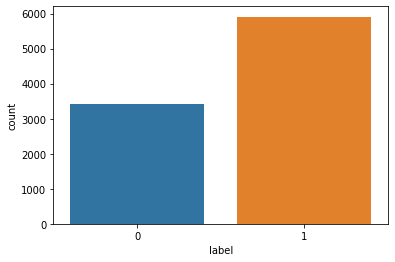

In [ ]:
ax = sns.countplot(df.label)

In [ ]:
positive = df['label'] == 1
df[positive]

review  label
0      Sve je bilo odliƒçno. Gospoƒëa koja nas je doƒçek...      1
1      Vrlo lijepo ureƒëeno, prozraƒçno, izuzetno ƒçisto...      1
2            Odliƒçna lokacija, uredno, srdaƒçna domaƒáica.      1
3                               Malen i sladak apartman.      1
4      Apartman je na izvrsnoj lokaciji a gospoƒëa je ...      1
...                                                  ...    ...
10985                 Vrlo udobna,prostrana i ƒçista soba      1
10986  Lokacija je fantastiƒçna, doslovno uz samu cent...      1
10987  Kupaona sa velikim tu≈°em i lijepim ogledalom u...      1
10997  Jako uredno i ƒçisto. Sve je kao i na slikama. ...      1
10998  Domaƒáin ljubazan,lokacijama izvrsna udobno i ƒç...      1

[5909 rows x 2 columns]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 799.5, 599.5, -0.5)

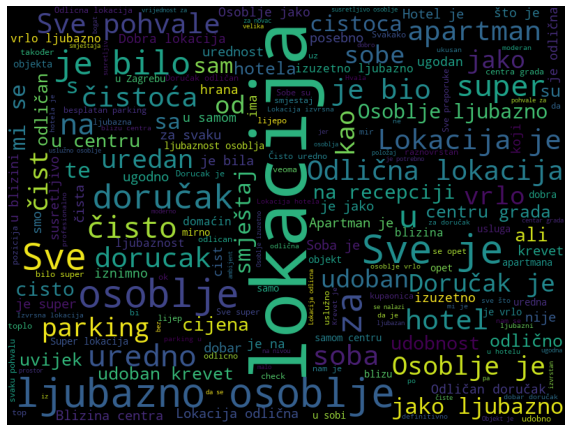

In [ ]:
cloud=WordCloud(width=800, height=600).generate(" ".join(df[positive]['review']))
plt.figure(figsize=(10,8))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
negative = df['label'] == 0
df[negative]

review  label
50     Kucali nam na vrata da moramo izac jer je cisc...      0
51                                    Sve je bulo dobro.      0
52                cuju se ‚Äúsusjedi‚Äù iz drugog apartmana.      0
53                                   Sve je bilo u redu.      0
54                                            Nema togaüòÑ      0
...                                                  ...    ...
10993                       Nemamo niti jednu zamjerku..      0
10994                       Steta sto su prozori fiksni.      0
10995                          NEMA BESPLATNOG PARKINGA!      0
10996                      Nemam odgovor, sve je EKSTRA!      0
10999                                        Bez gre≈°ke.      0

[3430 rows x 2 columns]

(-0.5, 799.5, 599.5, -0.5)

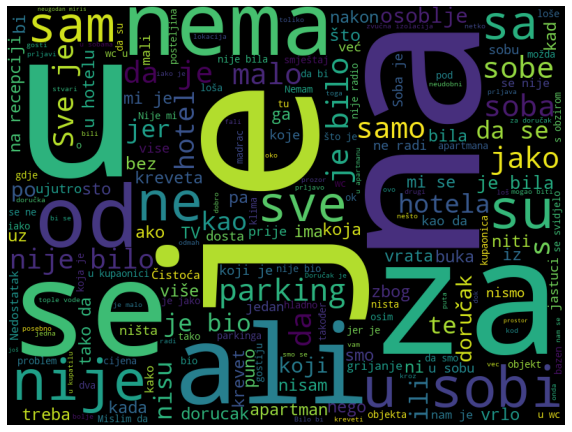

In [ ]:
cloud=WordCloud(width=800, height=600).generate(" ".join(df[negative]['review']))
plt.figure(figsize=(10,8))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
# 10 najuƒçestalijih tokena
from collections import Counter
counter_words = Counter()
import string

for word in words:
  if word not in string.punctuation:
    counter_words.update({word})
counter_words.most_common(10)

[('je', 2399),
 ('i', 1859),
 ('u', 1792),
 ('se', 1222),
 ('na', 1104),
 ('da', 1085),
 ('za', 934),
 ('nije', 809),
 ('ne', 529),
 ('bilo', 510)]

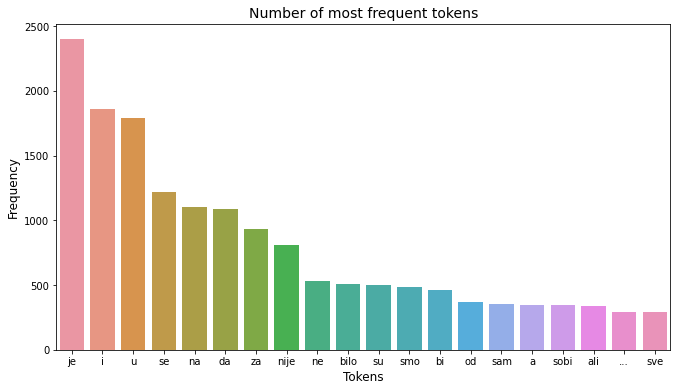

In [ ]:
# Vizualizacija 20 najƒçe≈°ƒáih tokena s njihovim frekvencijama
xs=[x for x, y in counter_words.most_common(20)]
ys=[y for x, y in counter_words.most_common(20)]
plt.figure(figsize = (11, 6))
sns.barplot(
x=xs[:20],
y=ys[:20])
plt.xlabel("Tokens", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title('Number of most frequent tokens', fontsize = 14);
plt.show()

In [ ]:
import nltk
from nltk import pos_tag_sents # more magic
nltk.download('averaged_perceptron_tagger')
tagged_sentences = pos_tag_sents(sentences_with_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Funkcija koja vraƒáa frekvencije rijeƒçi ovisno o definiciji
def count_word_type(tagged_sentences, word_type_tag = "NN"):
  counter = Counter()
  for sentence in tagged_sentences:
    for word, tag in sentence:
      if word_type_tag in tag and len(word) > 4:
        counter.update({word})
  return counter

In [ ]:
# 20 najƒçe≈°ƒáih imenica
count_word_type(tagged_sentences, "JJ").most_common(20)

[('nismo', 49),
 ('ujutro', 43),
 ('nisam', 43),
 ('nakon', 29),
 ('super', 24),
 ('ne≈°to', 22),
 ('netko', 22),
 ('nista', 20),
 ('u≈æasno', 20),
 ('uvijek', 18),
 ('nalazi', 17),
 ('neudoban', 16),
 ('ni≈°ta', 15),
 ('nedostatak', 15),
 ('umjesto', 14),
 ('neugodan', 14),
 ('uglavnom', 13),
 ('uopƒáe', 13),
 ('nekim', 13),
 ('nemam', 13)]

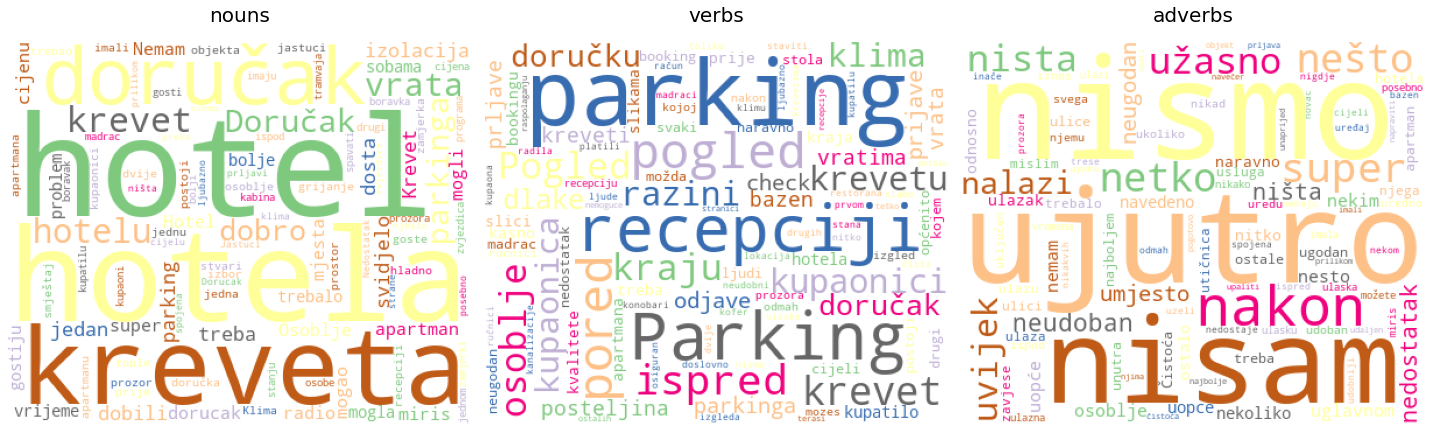

In [ ]:
from wordcloud import WordCloud
# Vizualizacija najƒçe≈°ƒáih imenica, pridjeva i glagola u kratkim sadr≈æajima
fig = plt.figure(figsize=(20,10))
tags = {"NN": "nouns", "VB": "verbs", "JJ": "adverbs"}
for i, tag in enumerate(tags.keys()):
  plt.subplot(1,3,i+1)
  counter = count_word_type(tagged_sentences, tag)
  wc = WordCloud(
    width=400,
    height=330,
    max_words=100,
    colormap="Accent",
    background_color="white").generate_from_frequencies(counter)
  plt.imshow(wc)
  plt.axis("off")
  plt.title(tags[tag], fontsize=20, pad=20)
plt.tight_layout()
plt.show()